In [1]:
import sys
sys.path.append('/Users/czkaiweb/Research/ErdosBootCamp/May2022/vanGogh-and-Other-Artist')
from genericCNN import *
from preprocessing.ImageTranform import *
from torchsummary import summary

In [2]:
myObj = genericCNN()

# Set up the transformer
myTransform = ImageTransformer((224,224))
myTransform.initTransform()
transformer = myTransform.getTransformer()

myObj.setTransformer(transformer)
# Decide if adding normalization layer at the end of transformation, by default, normalization will be added
# myObj.UseNormalized(normalize = True)

In [3]:
# Set up the meta data and path to image dataset
myObj.setDataset("../data/meta.csv",path = "../data/imgs")

# Split the data by portion, fraction indicate the percentage of data used in the whole dataset. 
# Default: val_size = 0.2, test_size = 0.1 
myObj.splitData(val_size=0.2,test_size = 0.1,fraction = 0.01)

# Will automatically get the statistic for training set, update the mean/std used for normalization. 
# loadData and checkDataset
myObj.loadData()

bcbf898f298ba2a00e088c50e3e27134 torch.Size([1, 224, 224])


0 torch.Size([5, 3, 224, 224]) tensor([0, 0, 3, 0, 0])
torch.Size([5, 3, 224, 224])


<Figure size 432x288 with 0 Axes>

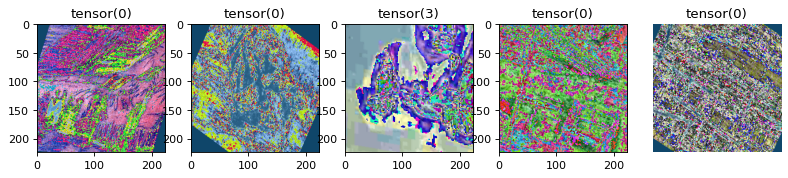

In [4]:
myObj.showDatasetBatch()

In [5]:
from torchvision import datasets, models, transforms
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler

model_ft = models.vgg16()
model_ft.load_state_dict(torch.load('./weights/vgg16-397923af.pth'))
num_ftrs = model_ft.classifier[6].in_features
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).
model_ft.classifier[6] = nn.Linear(num_ftrs, 6)

model_ft = model_ft.to(myObj.device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

In [6]:
myObj.setModel(model = model_ft,modeltag="vgg16mod")

for index, data in enumerate(myObj.trainDataset):
    print(index)
    inputs = data["image"]
    labels = data["artist"]
    if tuple(inputs.shape) != (3,224,224):
        reLoadFlag = True
        print(data["hash"],inputs.shape)
        myObj.trainDF.drop(myObj.trainDF[myObj.trainDF["hash"]==data["hash"]].index)

In [7]:
myObj.train_model(criterion, optimizer_ft, exp_lr_scheduler, num_epochs=2)

Epoch 0 Phase train:   0%|          | 0/8 [00:00<?, ?batch/s]

Epoch 0/1
----------


Epoch 0 Phase val:   0%|          | 0/2 [00:00<?, ?batch/s]

train Loss: 1.7198 Acc: 0.3333


  0%|          | 0/8 [00:00<?, ?batch/s]

val Loss: 2.0735 Acc: 0.3000

Epoch 1/1
----------


Epoch 1 Phase val:   0%|          | 0/2 [00:00<?, ?batch/s]

train Loss: 0.9315 Acc: 0.6923


Epoch 1 Phase val: 100%|██████████| 2/2 [00:04<00:00,  2.10s/batch]


val Loss: 1.8213 Acc: 0.4000

Training complete in 1m 46s
Best val Acc: 0.400000


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1